# Data Visualization

## Import and setup

In [1]:
# Pandas is used for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import string
import random

pd.options.mode.chained_assignment = None  # default='warn'

# NLTK tokenization, stopword removal and vader 
import nltk

----

## Get results of 2020

### Open .pkl file of sentiment analysis

In [2]:
with open('src/2020_clean_pinkbike_comments.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)
len(df.index)

128505

#### Show ratio of positiv to negative comments of N

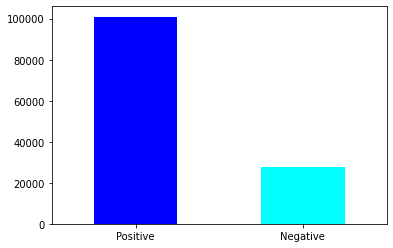

In [3]:
result = df['sentiment'].value_counts()
result.plot(kind = 'bar', rot = 0, color = ['blue','cyan']);

### Pearson correlation coefficient top 25:
#### between sentiment analysis mean compound and beat participants in races

In [4]:
rider_top_25_2020 = [
    ["Matt", "Walker", ""], 
    ["Loic", "Bruni", "Superbruni"],
    ["Greg", "Minnaar", ""],
    ["Loris", "Vergier", ""],
    ["Thibaut", "Daprela", ""],
    ["Troy", "Brosnan", ""],
    ["Angel", "Suarez Alonso", "Angel"],
    ["Remi", "Thirion", ""],
    ["Aaron", "Gwin", ""],
    ["Luca", "Shaw", ""],
    ["Jamie", "Edmondson", ""],
    ["David", "Trummer", ""],
    ["Finn", "Iles", ""],
    ["Philip", "Atwill", ""],
    ["Dakotah", "Norton", ""],
    ["Martin", "Maes", ""],
    ["Benoit", "Coulanges", ""],
    ["Baptiste", "Pierron", "Baptiste Pierron"],
    ["Danny", "Hart", "Redcar Rocket"],
    ["Loris", "Revelli", ""],
    ["Andreas", "Kolb", ""],
    ["Joe", "Breeden", ""],
    ["Jack", "Moir", "Shark Attack Jack"],
    ["Bernard", "Kerr", ""],
    ["Charlie", "Hatton", ""]
]

#### Create df with mean compound and mean of riders beat for analysis

In [5]:
rider_sentiment_dict_list = []

def analyse_data(first_name, last_name, nick_name):

    rider_filter = [last_name, nick_name]
    if nick_name == "":
        rider_filter_regex = last_name
    else:
        rider_filter_regex = '|'.join(rider_filter)

    df_sentiment = df.loc[df['comments'].str.contains(rider_filter_regex, case = False, regex = True)]

    full_name = first_name + " " + last_name
    sample_size = len(df_sentiment.index)
    mean_compound = df_sentiment["compound"].mean()

    rider_sentiment_dict = {
        "rider name": full_name,
        "sentiment sample size": sample_size,
        "sentiment mean compound": mean_compound
    }

    rider_sentiment_dict_list.append(rider_sentiment_dict)

for rider in rider_top_25_2020:
    analyse_data(rider[0],rider[1],rider[2])
    
df_top_25_2020 = pd.DataFrame(rider_sentiment_dict_list)

In [6]:
df_result = pd.read_csv('src/2020_results.csv')
df_result.columns = ['rider name', 'mean of riders beat']

In [7]:
def analyse_data(first_name, last_name, nick_name):
    
    full_name = first_name + " " + last_name
    rider_filter = last_name

    df_trans = df_result.loc[df_result['rider name'].str.contains(rider_filter, case = False)]
    df_result['rider name'][df_result['rider name'].str.contains(rider_filter, case = False, regex = True)] = full_name
    
    sr_result = df_result.set_index("rider name")["mean of riders beat"].to_dict()
    
    df_top_25_2020["mean of riders beat"] = df_top_25_2020["rider name"].map(sr_result)

for rider in rider_top_25_2020:
    analyse_data(rider[0],rider[1],rider[2])
    
# Manuelles nachtragen der nicht gemappten Werte
df_top_25_2020.at[[6], 'mean of riders beat'] = [76.4]

display(df_top_25_2020)

,rider name,sentiment sample size,sentiment mean compound,mean of riders beat
0,Matt Walker,103,0.255019,94.800000
1,Loic Bruni,171,0.333219,81.600000
2,Greg Minnaar,146,0.387250,91.200000
3,Loris Vergier,51,0.383986,79.000000
4,Thibaut Daprela,15,0.358360,92.400000
5,Troy Brosnan,44,0.155550,92.600000
6,Angel Suarez Alonso,106,0.255692,76.400000
7,Remi Thirion,23,0.347730,83.200000
8,Aaron Gwin,366,0.326418,77.000000
9,Luca Shaw,68,0.294226,78.000000


In [8]:
sum_n = df_top_25_2020["sentiment sample size"].sum()
print(sum_n)

2475


In [9]:
corr_beat = df_top_25_2020["sentiment mean compound"].corr(df_top_25_2020["mean of riders beat"])
print(corr_beat)

0.10703730258127477


In [10]:
corr_size = df_top_25_2020["sentiment sample size"].corr(df_top_25_2020["mean of riders beat"])
print(corr_size)

-0.2703143831294623


In [11]:
std = df_top_25_2020["sentiment mean compound"].std()
print(std)

0.07715068607614416


In [12]:
sns.set_style("dark")

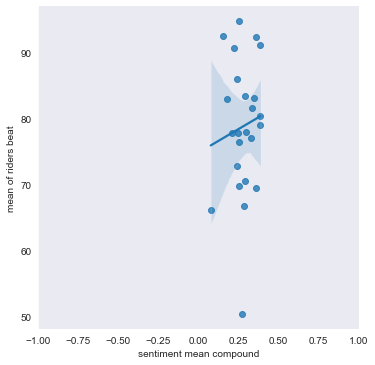

In [45]:
sns.lmplot(x = "sentiment mean compound", y = "mean of riders beat", data = df_top_25_2020)

# control x and y limits
# plt.ylim(0, 100)
plt.xlim(-1, 1)
 
plt.show()

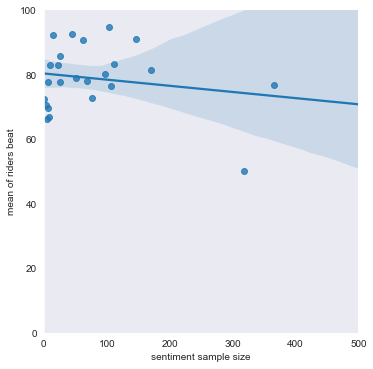

In [46]:
sns.lmplot(x = "sentiment sample size", y = "mean of riders beat", data = df_top_25_2020)

# control x and y limits
plt.ylim(0, 100)
plt.xlim(0, 500)
 
plt.show()

----

## Get results of 2019

### Open .pkl file of sentiment analysis

In [14]:
with open('src/2019_clean_pinkbike_comments.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)
len(df.index)

125307

#### Show ratio of positiv to negative comments of N

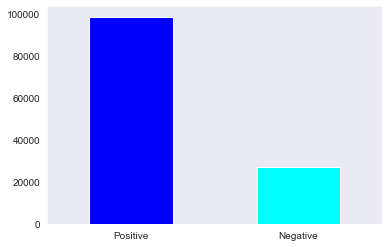

In [15]:
result = df['sentiment'].value_counts()
result.plot(kind = 'bar', rot = 0, color = ['blue','cyan']);

### Pearson correlation coefficient top 25:
#### between sentiment analysis mean compound and beat participants in races

In [16]:
rider_top_25_2019 = [
    ["Loic", "Bruni", "Superbruni"],
    ["Amaury", "Pierron", ""], 
    ["Troy", "Brosnan", ""],
    ["Danny", "Hart", "Redcar Rocket"],
    ["Loris", "Vergier", ""],
    ["Greg", "Minnaar", ""],
    ["Laurie", "Greenland", ""],
    ["Mark", "Wallace", ""],
    ["David", "Trummer", ""],
    ["Dean", "Lucas", ""],
    ["Brook", "Macdonald", "Bulldog"],
    ["Remi", "Thirion", ""],
    ["Charlie", "Harrison", ""],
    ["Luca", "Shaw", ""],
    ["Dakotah", "Norton", ""],
    ["Matt", "Walker", ""],
    ["Connor", "Fearon", ""],
    ["Reece", "Wilson", ""],
    ["Baptiste", "Pierron", "Baptiste Pierron"],
    ["Aaron", "Gwin", ""],
    ["Finn", "Iles", ""],
    ["Greg", "Williamson", ""],
    ["Thomas", "Estaque", ""],
    ["Gee", "Atherton", ""],
    ["Charlie", "Hatton", ""]
]

In [17]:
rider_result_dict_list = []

def analyse_data(first_name, last_name, nick_name):

    rider_filter = [last_name, nick_name]
    if nick_name == "":
        rider_filter_regex = last_name
    else:
        rider_filter_regex = '|'.join(rider_filter)

    df_single_rider = df.loc[df['comments'].str.contains(rider_filter_regex, case = False, regex = True)]

    full_name = first_name + " " + last_name
    sample_size = len(df_single_rider.index)
    mean_compound = df_single_rider["compound"].mean()

    rider_result_dict = {
        "rider name": full_name,
        "sentiment sample size": sample_size,
        "sentiment mean compound": mean_compound
    }

    rider_result_dict_list.append(rider_result_dict)

for rider in rider_top_25_2019:
    analyse_data(rider[0],rider[1],rider[2])
    
df_top_25_2019 = pd.DataFrame(rider_result_dict_list)

In [18]:
df_result = pd.read_csv('src/2019_results.csv')
df_result.columns = ['rider name', 'mean of riders beat']

In [19]:
def analyse_data(first_name, last_name, nick_name):
    
    full_name = first_name + " " + last_name
    rider_filter = last_name

    df_trans = df_result.loc[df_result['rider name'].str.contains(rider_filter, case = False)]
    df_result['rider name'][df_result['rider name'].str.contains(rider_filter, case = False, regex = True)] = full_name
    
    sr_result = df_result.set_index("rider name")["mean of riders beat"].to_dict()
    
    df_top_25_2019["mean of riders beat"] = df_top_25_2019["rider name"].map(sr_result)

for rider in rider_top_25_2019:
    analyse_data(rider[0],rider[1],rider[2])

# Manuelles nachtragen der nicht gemappten Werte
df_top_25_2019.at[[1, 3, 9, 13], 'mean of riders beat'] = [98.44444444444444, 94.33333333333333, 83, 77.55555555555556]
    
display(df_top_25_2019)

,rider name,sentiment sample size,sentiment mean compound,mean of riders beat
0,Loic Bruni,201,0.463698,98.666667
1,Amaury Pierron,146,0.294738,98.444444
2,Troy Brosnan,85,0.340406,97.444444
3,Danny Hart,275,0.352355,94.333333
4,Loris Vergier,44,0.404080,83.888889
5,Greg Minnaar,182,0.408535,85.333333
6,Laurie Greenland,49,0.419916,91.000000
7,Mark Wallace,84,0.140435,87.666667
8,David Trummer,39,0.274951,86.444444
9,Dean Lucas,84,0.421663,83.000000


In [20]:
sum_n = df_top_25_2019["sentiment sample size"].sum()
print(sum_n)

3380


In [21]:
corr_beat = df_top_25_2019["sentiment mean compound"].corr(df_top_25_2019["mean of riders beat"])
print(corr_beat)

0.22481245121995427


In [22]:
corr_size = df_top_25_2019["sentiment sample size"].corr(df_top_25_2019["mean of riders beat"])
print(corr_size)

-0.19448522842305507


In [23]:
std = df_top_25_2019["sentiment mean compound"].std()
print(std)

0.16905432796383912


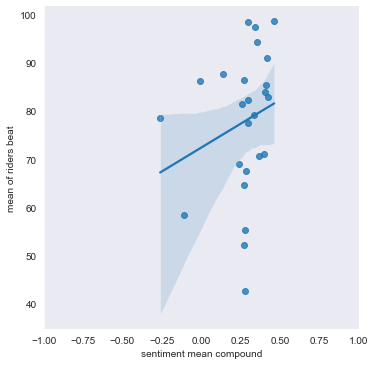

In [47]:
sns.lmplot(x = "sentiment mean compound", y = "mean of riders beat", data = df_top_25_2019)

# control x and y limits
# plt.ylim(0, 100)
plt.xlim(-1, 1)
 
plt.show()

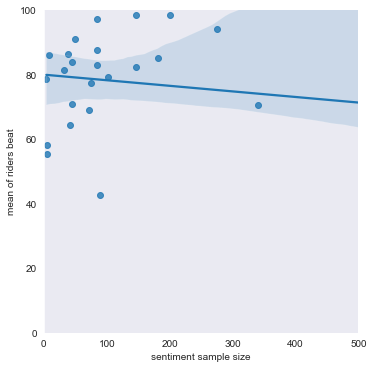

In [48]:
sns.lmplot(x = "sentiment sample size", y = "mean of riders beat", data = df_top_25_2019)

# control x and y limits
plt.ylim(0, 100)
plt.xlim(0, 500)
 
plt.show()

----

## Get results of 2018

### Open .pkl file of sentiment analysis

In [25]:
with open('src/2018_clean_pinkbike_comments.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)
len(df.index)

116723

#### Show ratio of positiv to negative comments of N

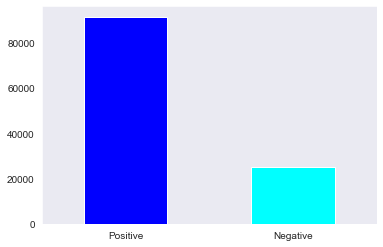

In [26]:
result = df['sentiment'].value_counts()
result.plot(kind = 'bar', rot = 0, color = ['blue','cyan']);

### Pearson correlation coefficient top 25:
#### between sentiment analysis mean compound and beat participants in races

In [27]:
rider_top_25_2018 = [
    ["Amaury", "Pierron", ""], 
    ["Danny", "Hart", "Redcar Rocket"],
    ["Troy", "Brosnan", ""],
    ["Loris", "Vergier", ""],
    ["Laurie", "Greenland", ""],
    ["Brook", "Macdonald", "Bulldog"],
    ["Loic", "Bruni", "Superbruni"],
    ["Luca", "Shaw", ""],
    ["Gee", "Atherton", ""],
    ["Connor", "Fearon", ""],
    ["Aaron", "Gwin", ""],
    ["Remi", "Thirion", ""],
    ["Sam", "Blenkinsop", "Blenki"],
    ["Mark", "Wallace", ""],
    ["Finn", "Iles", ""],
    ["Charlie", "Harrison", ""],
    ["Marcelo", "Gutierrez Villegas", "Gutierrez"],
    ["Reece", "Wilson", ""],
    ["Dean", "Lucas", ""],
    ["Martin", "Maes", ""],
    ["Matt", "Walker", ""],
    ["Dakotah", "Norton", ""],
    ["Adam", "Brayton", ""],
    ["Thomas", "Estaque", ""],
    ["Jack", "Moir", "Shark Attack Jack"]
]

In [28]:
rider_result_dict_list = []

def analyse_data(first_name, last_name, nick_name):

    rider_filter = [last_name, nick_name]
    if nick_name == "":
        rider_filter_regex = last_name
    else:
        rider_filter_regex = '|'.join(rider_filter)

    df_single_rider = df.loc[df['comments'].str.contains(rider_filter_regex, case = False, regex = True)]

    full_name = first_name + " " + last_name
    sample_size = len(df_single_rider.index)
    mean_compound = df_single_rider["compound"].mean()

    rider_result_dict = {
        "rider name": full_name,
        "sentiment sample size": sample_size,
        "sentiment mean compound": mean_compound
    }

    rider_result_dict_list.append(rider_result_dict)

for rider in rider_top_25_2018:
    analyse_data(rider[0],rider[1],rider[2])
    
df_top_25_2018 = pd.DataFrame(rider_result_dict_list)

In [29]:
df_result = pd.read_csv('src/2018_results.csv')
df_result.columns = ['rider name', 'mean of riders beat']

In [30]:
def analyse_data(first_name, last_name, nick_name):
    
    full_name = first_name + " " + last_name
    rider_filter = last_name

    df_trans = df_result.loc[df_result['rider name'].str.contains(rider_filter, case = False)]
    df_result['rider name'][df_result['rider name'].str.contains(rider_filter, case = False, regex = True)] = full_name

    sr_result = df_result.set_index("rider name")["mean of riders beat"].to_dict()
    
    df_top_25_2018["mean of riders beat"] = df_top_25_2018["rider name"].map(sr_result)

for rider in rider_top_25_2018:
    analyse_data(rider[0],rider[1],rider[2])

# Manuelles nachtragen der nicht gemappten Werte
df_top_25_2018.at[[0, 1, 7, 15, 16, 18], 'mean of riders beat'] = [88.375, 96.25, 81.375, 87.125, 86.625, 74.5]
    
display(df_top_25_2018)

,rider name,sentiment sample size,sentiment mean compound,mean of riders beat
0,Amaury Pierron,88,0.407624,88.375000
1,Danny Hart,272,0.277744,96.250000
2,Troy Brosnan,77,0.270613,95.375000
3,Loris Vergier,29,0.407728,92.750000
4,Laurie Greenland,32,0.431275,82.875000
5,Brook Macdonald,93,0.235110,74.250000
6,Loic Bruni,125,0.316566,82.875000
7,Luca Shaw,95,0.303019,81.375000
8,Gee Atherton,155,0.322464,97.625000
9,Connor Fearon,37,0.354900,89.625000


In [31]:
sum_n = df_top_25_2018["sentiment sample size"].sum()
print(sum_n)

5928


In [32]:
corr_beat = df_top_25_2018["sentiment mean compound"].corr(df_top_25_2018["mean of riders beat"])
print(corr_beat)

-0.024541674469323427


In [33]:
corr_size = df_top_25_2018["sentiment sample size"].corr(df_top_25_2018["mean of riders beat"])
print(corr_size)

0.28561917895596695


In [34]:
std = df_top_25_2018["sentiment mean compound"].std()
print(std)

0.1593102457824846


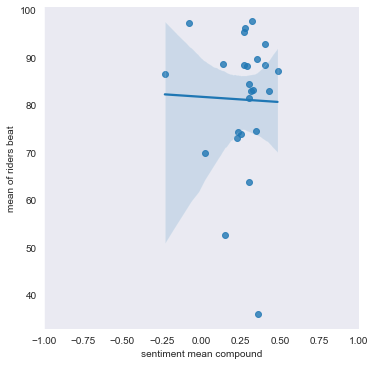

In [49]:
sns.lmplot(x = "sentiment mean compound", y = "mean of riders beat", data = df_top_25_2018)

# control x and y limits
# plt.ylim(0, 100)
plt.xlim(-1, 1)
 
plt.show()

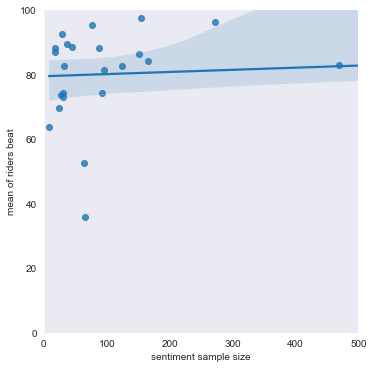

In [50]:
sns.lmplot(x = "sentiment sample size", y = "mean of riders beat", data = df_top_25_2018)

# control x and y limits
plt.ylim(0, 100)
plt.xlim(0, 500)
 
plt.show()